# LDA

In [ ]:
# 先降回穩定版本
!pip install numpy==1.24.4 scipy==1.10.1 -U --force-reinstall

  Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
  Using cached scipy-1.10.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (58 kB)
Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
Using cached scipy-1.10.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (34.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.4 which is incompatible.
blosc2 3.3.4 requires nump

KeyboardInterrupt: 

In [ ]:
!pip install gensim -q
import pandas as pd
import ast
from gensim import corpora, models

# 讀取斷詞結果
df = pd.read_csv("1.3_jay_cut_words.csv")

# 將字串形式的詞語清單轉回 list
df["cut_words"] = df["cut_words"].apply(ast.literal_eval)

# 建立字典與語料庫
dictionary = corpora.Dictionary(df["cut_words"])
corpus = [dictionary.doc2bow(text) for text in df["cut_words"]]

# 設定主題數量（可微調）
NUM_TOPICS = 6

# 訓練 LDA 模型
lda_model = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=NUM_TOPICS, passes=10, random_state=42)

# 顯示每個主題的 Top 詞語
print("🧠 主題關鍵詞（可命名）：\n")
for i, topic in lda_model.print_topics(num_words=10):
    print(f"主題 {i}：{topic}")

# 推論每則留言的主題分佈（僅取最大權重者）
topic_results = []
for doc_bow in corpus:
    topics = lda_model.get_document_topics(doc_bow)
    top_topic = max(topics, key=lambda x: x[1])
    topic_results.append(top_topic)

# 將主題結果加入原始資料
df["lda_topic"] = [t[0] for t in topic_results]
df["lda_topic_score"] = [t[1] for t in topic_results]

# 儲存結果
df.to_csv("jay_lda_topic_result.csv", index=False, encoding="utf-8-sig")
print("✅ 主題建模完成，已儲存為 jay_lda_topic_result.csv")


🧠 主題關鍵詞（可命名）：

主題 0：0.023*"喔" + 0.014*"2" + 0.012*"越" + 0.012*"啊" + 0.010*"哎" + 0.009*"哦" + 0.009*"0" + 0.009*"呦" + 0.008*"公公" + 0.008*"羅"
主題 1：0.029*"月" + 0.022*"1" + 0.019*"年" + 0.013*"3" + 0.012*"日" + 0.012*"來" + 0.010*"簽到" + 0.010*"2025" + 0.008*"11" + 0.008*"22"
主題 2：0.153*" " + 0.062*"的" + 0.024*"我" + 0.021*"了" + 0.021*"是" + 0.010*"有" + 0.010*"就" + 0.009*"也" + 0.009*"都" + 0.009*"不"
主題 3：0.660*" " + 0.013*"滑" + 0.010*"n" + 0.008*"呀" + 0.006*"ng" + 0.005*"i" + 0.004*"y" + 0.003*"de" + 0.003*"w" + 0.003*"u"
主題 4：0.095*" " + 0.076*"聽" + 0.053*"的" + 0.029*"了" + 0.029*"好" + 0.027*"這" + 0.024*"首歌" + 0.016*"歌" + 0.015*"很" + 0.015*"真的"
主題 5：0.076*"你" + 0.073*"我" + 0.066*" " + 0.057*"的" + 0.020*"在" + 0.014*"妳" + 0.013*"說" + 0.009*"著" + 0.008*"了" + 0.008*"愛"
✅ 主題建模完成，已儲存為 jay_lda_topic_result.csv


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30041 (\N{CJK UNIFIED IDEOGRAPH-7559}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35328 (\N{CJK UNIFIED IDEOGRAPH-8A00}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25976 (\N{CJK UNIFIED IDEOGRAPH-6578}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20027 (\N{CJK UNIFIED IDEOGRAPH-4E3B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38988 (\N{CJK UNIFIED IDEOGRAPH-984C}) missing from font(s) DejaVu Sans.
  fig.canvas

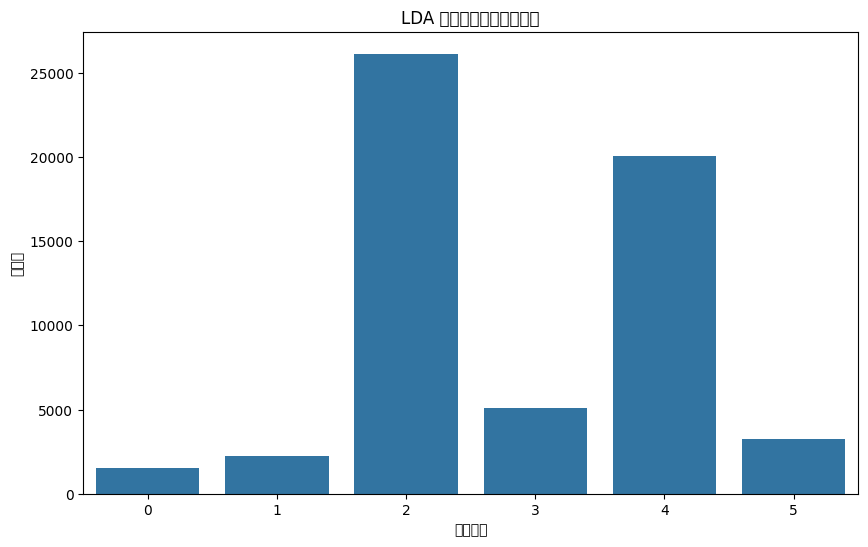

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 載入資料
df = pd.read_csv("2.1_LDA_jay_lda_topic_result.csv")

# 繪製主題分布
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="lda_topic", order=sorted(df["lda_topic"].unique()))
plt.title("LDA 主題分布（留言數量）")
plt.xlabel("主題編號")
plt.ylabel("留言數")
plt.show()


In [ ]:
# 對每個主題挑出 LDA score 最高的代表留言
top_comments = df.sort_values("lda_topic_score", ascending=False).groupby("lda_topic").head(3)

# 顯示結果（可自行調整 head(3) 中的數字）
top_comments[["lda_topic", "lda_topic_score", "text"]]


,lda_topic,lda_topic_score,text
55301,3,0.998584,滑呀滑\n 滑呀滑\n 滑呀滑\n 滑呀...
44193,3,0.996664,Ming Ming Jiu 明明就 (Obviously On) PinYin Lyric\...
19925,3,0.996317,Charles Xavier: Magneto get ready to rapture t...
34366,2,0.984330,这让我想起了我的初恋，那是在初中时候，她去了澳大利亚就再也没有联系，不过还是给了我很好的回忆...
44873,1,0.982262,昆凌昆凌昆凌昆凌昆凌昆凌昆凌昆凌昆凌昆凌昆凌昆凌昆凌昆凌昆凌昆凌昆凌昆凌昆凌昆凌昆凌昆凌昆凌...
528,4,0.978612,周杰倫周杰倫周杰倫\n周杰倫周杰倫周杰倫\n周杰倫周杰倫周杰倫\n周杰倫周杰倫\n周杰倫周杰...
4463,2,0.977804,"其實周董他爸很生氣因為很多人都以為周杰倫他媽被家暴, 其實他爸好像沒家暴, 周董後來還出來替..."
5200,2,0.977354,比他妈满狗不知道高到哪里去！日本跟中国同文同种，喜欢自己的文化有错吗？！你想别人喜欢你，就展...
4304,4,0.967838,周杰倫的歌一直以來都是經典，這首歌我聽了好多遍，連去KTV都會點，可說是經典中的經典
781,4,0.963701,周杰倫周杰倫周杰倫周杰倫周杰倫周杰倫周杰倫周杰倫周杰倫周杰倫周杰倫周杰倫周杰倫周杰倫周杰倫周...


# BerTopic

In [1]:
# Phase 2.2｜BERTopic 中文語意主題建模
!pip install -q bertopic sentence-transformers umap-learn hdbscan

import pandas as pd
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer

# === 1. 載入清洗後留言資料 ===
df = pd.read_csv("1.2_jay_comments_clean.csv")  # 原始乾淨語料

# 使用 text_cleaned 欄位作為語意來源
documents = df["text_cleaned"].astype(str).tolist()

# === 2. 使用中文語意 BERT 模型 ===
embedding_model = SentenceTransformer("paraphrase-multilingual-MiniLM-L12-v2")  # 可換 hfl/chinese-macbert-base

# === 3. 建立 BERTopic 模型（使用 CountVectorizer 可微調詞彙）===
vectorizer_model = CountVectorizer(ngram_range=(1, 2), stop_words=["的", "了", "啊", "你", "我", "也", "是", "都"])
topic_model = BERTopic(embedding_model=embedding_model, vectorizer_model=vectorizer_model,
                       language="multilingual", verbose=True, calculate_probabilities=True)

# === 4. 模型擬合 ===
topics, probs = topic_model.fit_transform(documents)

# # === 5. 合併結果 ===
# df["bertopic_topic"] = topics
# df["bertopic_prob"] = probs

# # 儲存主題結果
# df.to_csv("jay_bertopic_topic_result.csv", index=False, encoding="utf-8-sig")

# # 顯示主題資訊
# topic_model.get_topic_info().head(10)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.6/150.6 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 50.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 51.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 31.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 92.7 MB/s eta 0:00:00


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.89k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

2025-06-11 06:43:20,768 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/1823 [00:00<?, ?it/s]

2025-06-11 06:43:55,052 - BERTopic - Embedding - Completed ✓
2025-06-11 06:43:55,053 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-06-11 06:45:24,368 - BERTopic - Dimensionality - Completed ✓
2025-06-11 06:45:24,372 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-06-11 07:55:12,067 - BERTopic - Cluster - Completed ✓
2025-06-11 07:55:12,117 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-06-11 07:55:14,592 - BERTopic - Representation - Completed ✓


ValueError: Expected a 1D array, got an array with shape (58315, 812)

In [2]:
import numpy as np

# 取出每則留言最有信心的主題的機率（最大值）
max_probs = np.max(probs, axis=1)

# 正確合併
df["bertopic_topic"] = topics
df["bertopic_prob"] = max_probs


In [3]:
# 儲存主題結果
df.to_csv("jay_bertopic_topic_result.csv", index=False, encoding="utf-8-sig")
print("✅ BERTopic 主題建模完成，已儲存為 jay_bertopic_topic_result.csv")


✅ BERTopic 主題建模完成，已儲存為 jay_bertopic_topic_result.csv
